In [5]:
2 ** 100

1267650600228229401496703205376

In [6]:
import time

In [15]:
지역 = input("어디 사는 가요? ")
print("{}에 살고 계시는 군요.".format(지역))

어디 사는 가요? seoul
seoul에 살고 계시는 군요.


In [9]:
print("hello")
time.sleep(5)  # 5초 딜레이
print("world")

hello
world


# Pandas 맛보기

In [17]:
import pandas as pd

pd.__version__

'0.23.4'

In [24]:
df_list = pd.read_html('https://finance.naver.com/marketindex/exchangeList.nhn')
df = df_list[0]
df.columns = [
    '통화명', '매매기준율', '현찰 - 사실 때', '현찰 - 파실 때',
    '송금 - 보내실 때', '송금 - 받으실 때', '미화환산율',
]
df = df.set_index('통화명')
print(df.shape)
df.head()  # 상위 5행만 보기

(44, 6)


,매매기준율,현찰 - 사실 때,현찰 - 파실 때,송금 - 보내실 때,송금 - 받으실 때,미화환산율
통화명,,,,,,
미국 USD,1142.90,1162.90,1122.90,1154.10,1131.70,1.000
유럽연합 EUR,1283.42,1308.96,1257.88,1296.25,1270.59,1.123
일본 JPY (100엔),1026.26,1044.21,1008.31,1036.31,1016.21,0.898
중국 CNY,169.94,178.43,161.45,171.63,168.25,0.149
홍콩 HKD,145.60,148.46,142.74,147.05,144.15,0.127


In [25]:
df.to_excel("환율.xlsx")

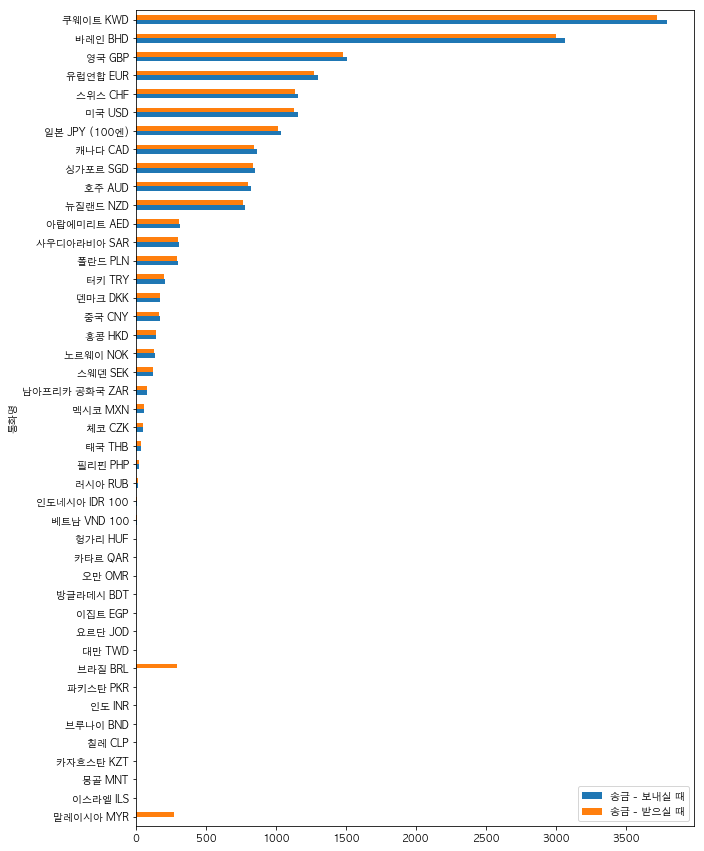

In [34]:
%matplotlib inline
from matplotlib import rc
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

rc('font', family='Malgun Gothic') # Windows 일 경우
# rc('font', family='AppleGothic') # Mac 일 경우

df2 = df.sort_values('송금 - 보내실 때', ascending=True)

names = ['송금 - 보내실 때', '송금 - 받으실 때']
df2[names].plot(kind='barh', figsize=(10, 15))

# Pandas 기본 자료구조

In [ ]:
학생성적 = [
    ['철수', 100, 90, 80],
    ['영희', 90, 70, 100],
]

## Series

In [37]:
mylist = [1, 2, 3, 1, 2, 3, 1, 2]
set(mylist)

{1, 2, 3}

In [38]:
series1 = pd.Series(['사과', '바나나', '딸기'])
series1

0     사과
1    바나나
2     딸기
dtype: object

In [39]:
series2 = pd.Series(['사과', '바나나', '딸기'],
                    index=[3, 2, 3])
series2

3     사과
2    바나나
3     딸기
dtype: object

In [41]:
pd.Series({3: '사과', 2: '바나나', 3: '딸기'})

3     딸기
2    바나나
dtype: object

In [44]:
series2[3]

3    사과
3    딸기
dtype: object

In [45]:
series2[2]

'바나나'

# 인터넷 데이터 읽어보기

In [67]:
코스닥_csv_url = "https://goo.gl/3p3bSG"
코피스_csv_url = "https://goo.gl/aUHznC"

In [52]:
df = pd.read_csv(코스닥_csv_url)
print(df.shape)
df.head()  # 상위 5행

(1231, 2)


,종목명,종목코드
0,제일홀딩스,3380
1,하나금융9호스팩,261200
2,교보7호스팩,267320
3,보라티알,250000
4,한화수성스팩,265920


In [55]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df['종목명'].head()  # 한 컬럼

0       제일홀딩스
1    하나금융9호스팩
2      교보7호스팩
3        보라티알
4      한화수성스팩
Name: 종목명, dtype: object

In [58]:
df.loc[3]

종목명       보라티알
종목코드    250000
Name: 3, dtype: object

## index 지정

In [69]:
df = pd.read_csv(코스닥_csv_url, index_col='종목명',
                 dtype={'종목코드': str})
print(df.shape)
df.head()  # 상위 5행

(1231, 1)


,종목코드
종목명,
제일홀딩스,003380
하나금융9호스팩,261200
교보7호스팩,267320
보라티알,250000
한화수성스팩,265920


In [64]:
# df2 = df.set_index('종목명')
df.loc['보라티알']

종목코드    250000
Name: 보라티알, dtype: int64

In [65]:
df.columns

Index(['종목코드'], dtype='object')

In [66]:
df.index

Index(['제일홀딩스', '하나금융9호스팩', '교보7호스팩', '보라티알', '한화수성스팩', '매일유업', '삼양옵틱스',
       'IBKS제6호스팩', '필옵틱스', '미래에셋대우스팩1호',
       ...
       '에이티넘인베스트', '대동기어', '피에스텍', '코센', '카스', '하이록코리아', 'SBI인베스트먼트', '엠벤처투자',
       '제미니투자', '모헨즈'],
      dtype='object', name='종목명', length=1231)

In [68]:
int('003380')

3380

In [71]:
df = pd.read_csv("https://goo.gl/iDUKrL", index_col='곡일련번호')
print(df.shape)
df.head()

(100, 6)


,순위,앨범,곡명,가수,커버이미지_주소,좋아요
곡일련번호,,,,,,
31346009,1,삐삐,삐삐,아이유,https://cdnimg.melon.co.kr/cm/album/images/102...,61528
31344113,2,시간이 들겠지,시간이 들겠지 (Feat. Colde),로꼬,https://cdnimg.melon.co.kr/cm/album/images/102...,48331
31340985,3,쇼미더머니 777 Episode 1,Good Day (Feat. 팔로알토) (Prod. 코드 쿤스트),pH-1,https://cdnimg.melon.co.kr/cm/album/images/102...,54022
31316695,4,하루도 그대를 사랑하지 않은 적이 없었다,하루도 그대를 사랑하지 않은 적이 없었다,임창정,https://cdnimg.melon.co.kr/cm/album/images/102...,97984
31266290,5,LOVE YOURSELF 結 `Answer`,IDOL,방탄소년단,https://cdnimg.melon.co.kr/cm/album/images/101...,173279


In [77]:
top10_series = df['가수'].value_counts().sort_values(ascending=False)[:10]
top10_series

방탄소년단              14
뉴이스트 W              8
Wanna One (워너원)     5
멜로망스                4
iKON                3
EXO                 3
폴킴                  2
닐로 (Nilo)           2
로꼬                  2
비투비                 2
Name: 가수, dtype: int64

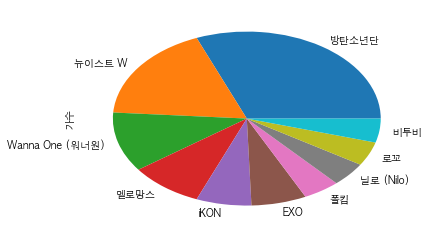

In [79]:
top10_series.plot(kind='pie')

## 멜론 차트 데이터

In [80]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 멜론 차트 페이지의 HTML 응답 문자열을 획득합니다.

url = 'http://www.melon.com/chart/index.htm'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
    'Referer': 'http://www.melon.com',
}
html = requests.get(url, headers=headers).text

# HTML 응답 문자열로부터, 필요한 태그 정보를 추출하기 위해, BeautifulSoup4 객체를 생성합니다.
soup = BeautifulSoup(html, 'html.parser')

In [83]:
# BeautifulSoup4 객체를 통해 노래 정보를 추출해냅니다.
song_list = []
for song_tag in soup.select('#tb_list tbody tr'):
    곡일련번호 = song_tag['data-song-no']
    커버이미지_주소 = song_tag.select_one('img')['src']
    곡명 = song_tag.select_one('a[href*=playSong]').text
    가수 = song_tag.select_one('a[href*=goArtistDetail]').text
    앨범 = song_tag.select_one('a[href*=goAlbumDetail]')['title']
    순위 = song_tag.select_one('.rank').text
    song = {
        '곡일련번호': 곡일련번호, '순위': 순위, '곡명': 곡명,
        '가수': 가수, '앨범': 앨범, '커버이미지_주소': 커버이미지_주소,
    }
    song_list.append(song)
    
song_list

[{'곡일련번호': '31709523',
  '순위': '1',
  '곡명': '나만, 봄',
  '가수': '볼빨간사춘기',
  '앨범': '사춘기집Ⅰ 꽃기운',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/68/898/10268898_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31717822',
  '순위': '2',
  '곡명': 'Kill This Love',
  '가수': 'BLACKPINK',
  '앨범': 'KILL THIS LOVE',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/70/288/10270288_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31688205',
  '순위': '3',
  '곡명': '사계 (Four Seasons)',
  '가수': '태연 (TAEYEON)',
  '앨범': '사계 (Four Seasons)',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/65/079/10265079_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31709524',
  '순위': '4',
  '곡명': '별 보러 갈래?',
  '가수': '볼빨간사춘기',
  '앨범': '사춘기집Ⅰ 꽃기운',
  '커버이미지_주소': 'https://cdnimg.melon.co.kr/cm/album/images/102/68/898/10268898_500.jpg/melon/resize/120/quality/80/optimize'},
 {'곡일련번호': '31706215',
  '순위': '5',
  '곡명': '사월이 지나면 우리 헤어져요 (Beautiful goodbye)',

In [85]:
df = pd.DataFrame(song_list).set_index('곡일련번호')
print(df.shape)
df.head()

(100, 5)


,가수,곡명,순위,앨범,커버이미지_주소
곡일련번호,,,,,
31709523,볼빨간사춘기,"나만, 봄",1,사춘기집Ⅰ 꽃기운,https://cdnimg.melon.co.kr/cm/album/images/102...
31717822,BLACKPINK,Kill This Love,2,KILL THIS LOVE,https://cdnimg.melon.co.kr/cm/album/images/102...
31688205,태연 (TAEYEON),사계 (Four Seasons),3,사계 (Four Seasons),https://cdnimg.melon.co.kr/cm/album/images/102...
31709524,볼빨간사춘기,별 보러 갈래?,4,사춘기집Ⅰ 꽃기운,https://cdnimg.melon.co.kr/cm/album/images/102...
31706215,첸 (CHEN),사월이 지나면 우리 헤어져요 (Beautiful goodbye),5,"사월, 그리고 꽃 - The 1st Mini Album",https://cdnimg.melon.co.kr/cm/album/images/102...


In [107]:
# 추출해낸 곡 정보를 Pandas의 DataFrame화 시킵니다.
columns = ['순위', '곡일련번호', '앨범', '곡명', '가수', '커버이미지_주소']

song_df = pd.DataFrame(song_list, columns=columns).set_index('곡일련번호')
# song_df의 인덱스가 노래 id 목록입니다.

song_id_list = song_df.index  # 순회가능한 객체 (Iterable Object)
# 노래별 "좋아요" 정보는 별도로 요청. 노래 id 목록을 인자로 넘겨서 좋아요 정보를 획득

url = 'http://www.melon.com/commonlike/getSongLike.json'
params = {'contsIds': song_id_list}
result = requests.get(url, headers=headers, params=params).json()
like_dict = {  # Dict Comprehension
    str(song['CONTSID']):song['SUMMCNT']
    for song in result['contsLike'] }
# 좋아요 정보를 song_df에 새로운 필드로 추가합니다.

song_df['좋아요'] = pd.Series(like_dict)

In [97]:
print(song_df.shape)
song_df.head()

(100, 6)


,순위,앨범,곡명,가수,커버이미지_주소,좋아요
곡일련번호,,,,,,
31709523,1,사춘기집Ⅰ 꽃기운,"나만, 봄",볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,67637
31717822,2,KILL THIS LOVE,Kill This Love,BLACKPINK,https://cdnimg.melon.co.kr/cm/album/images/102...,47976
31688205,3,사계 (Four Seasons),사계 (Four Seasons),태연 (TAEYEON),https://cdnimg.melon.co.kr/cm/album/images/102...,115421
31709524,4,사춘기집Ⅰ 꽃기운,별 보러 갈래?,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,36918
31706215,5,"사월, 그리고 꽃 - The 1st Mini Album",사월이 지나면 우리 헤어져요 (Beautiful goodbye),첸 (CHEN),https://cdnimg.melon.co.kr/cm/album/images/102...,86801


In [98]:
mylist = []
for i in range(10):
    mylist.append(i ** 2)
mylist

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [99]:
[i**2 for i in range(10)]  # List Comprehension

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [101]:
{i%5 for i in range(100)}  # Set Comprehension

{0, 1, 2, 3, 4}

In [103]:
{i: i%5 for i in range(10)}  # Dict Comprehension

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 0, 6: 1, 7: 2, 8: 3, 9: 4}

In [105]:
(i**2 for i in range(10))  # Generator Expression

<generator object <genexpr> at 0x11693fa20>

In [117]:
!pip install pandas-datareader

    100% |████████████████████████████████| 112kB 355kB/s ta 0:00:01


In [122]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('010120.KS', '2016-01-01')
print(df.shape)
df.head()

(755, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46000.0,44850.0,46000.0,44850.0,89011.0,43243.832031
2016-01-05,45900.0,44200.0,44200.0,45850.0,108102.0,44208.019531
2016-01-06,45850.0,44600.0,45850.0,45000.0,105914.0,43388.460938
2016-01-07,45150.0,44000.0,44850.0,44700.0,117716.0,43099.203125
2016-01-08,44800.0,43750.0,44300.0,44600.0,91260.0,43002.785156


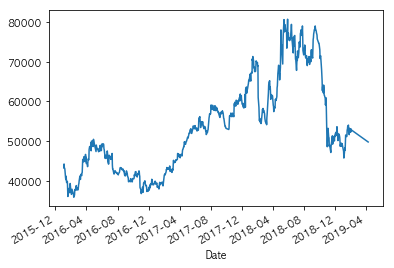

In [124]:
df['Adj Close'].plot()

In [125]:
import seaborn as sns

In [129]:
tip_df = sns.load_dataset('tips')
print(tip_df.shape)
tip_df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [143]:
tip_df.pivot_table(index='sex',
    values=['tip', 'total_bill'],
    aggfunc=['mean', 'max'])

mean              max           
             tip total_bill   tip total_bill
sex                                         
Male    3.089618  20.744076  10.0      50.81
Female  2.833448  18.056897   6.5      44.30

In [135]:
df = sns.load_dataset('titanic')
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [140]:
df = df.sort_values(by='pclass')

In [141]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
445,1,1,male,4.0,0,2,81.8583,S,First,child,False,A,Southampton,yes,False
310,1,1,female,24.0,0,0,83.1583,C,First,woman,False,C,Cherbourg,yes,True
309,1,1,female,30.0,0,0,56.9292,C,First,woman,False,E,Cherbourg,yes,True
307,1,1,female,17.0,1,0,108.9000,C,First,woman,False,C,Cherbourg,yes,False
306,1,1,female,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True


# 행/단위 컬럼 조회

In [144]:
print(song_df.shape)
song_df.head()

(100, 7)


,순위,앨범,곡명,가수,커버이미지_주소,좋아요,test
곡일련번호,,,,,,,
31709523,1,사춘기집Ⅰ 꽃기운,"나만, 봄",볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,67656,0
31717822,2,KILL THIS LOVE,Kill This Love,BLACKPINK,https://cdnimg.melon.co.kr/cm/album/images/102...,47994,1
31688205,3,사계 (Four Seasons),사계 (Four Seasons),태연 (TAEYEON),https://cdnimg.melon.co.kr/cm/album/images/102...,115426,2
31709524,4,사춘기집Ⅰ 꽃기운,별 보러 갈래?,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,36927,3
31706215,5,"사월, 그리고 꽃 - The 1st Mini Album",사월이 지나면 우리 헤어져요 (Beautiful goodbye),첸 (CHEN),https://cdnimg.melon.co.kr/cm/album/images/102...,86810,4


In [145]:
song_df.columns

Index(['순위', '앨범', '곡명', '가수', '커버이미지_주소', '좋아요', 'test'], dtype='object')

In [158]:
# names = '가수'
names = ['곡명', '가수']
song_df[names].head()

,곡명,가수
곡일련번호,,
31709523,"나만, 봄",볼빨간사춘기
31717822,Kill This Love,BLACKPINK
31688205,사계 (Four Seasons),태연 (TAEYEON)
31709524,별 보러 갈래?,볼빨간사춘기
31706215,사월이 지나면 우리 헤어져요 (Beautiful goodbye),첸 (CHEN)


In [162]:
song_df['가수']  # Series
song_df[['가수']].head(3)  # DataFrame

,가수
곡일련번호,
31709523,볼빨간사춘기
31717822,BLACKPINK
31688205,태연 (TAEYEON)


In [171]:
# song_df.loc['31709523']

song_df.loc[['31709523', '31688205']][['곡명', '가수']]

,곡명,가수
곡일련번호,,
31709523,"나만, 봄",볼빨간사춘기
31688205,사계 (Four Seasons),태연 (TAEYEON)


In [181]:
song_df.loc['31717822':'31709524']

,순위,앨범,곡명,가수,커버이미지_주소,좋아요,test
곡일련번호,,,,,,,
31717822,2,KILL THIS LOVE,Kill This Love,BLACKPINK,https://cdnimg.melon.co.kr/cm/album/images/102...,47994,1
31688205,3,사계 (Four Seasons),사계 (Four Seasons),태연 (TAEYEON),https://cdnimg.melon.co.kr/cm/album/images/102...,115426,2
31709524,4,사춘기집Ⅰ 꽃기운,별 보러 갈래?,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,36927,3


In [213]:
song_df.iloc[1:4]

,앨범,곡명,가수,커버이미지_주소,좋아요,test
곡일련번호,,,,,,
31717822,KILL THIS LOVE,Kill This Love,BLACKPINK,https://cdnimg.melon.co.kr/cm/album/images/102...,47994,1
31688205,사계 (Four Seasons),사계 (Four Seasons),태연 (TAEYEON),https://cdnimg.melon.co.kr/cm/album/images/102...,115426,2
31709524,사춘기집Ⅰ 꽃기운,별 보러 갈래?,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,36927,3


In [188]:
mask = song_df['가수'] == '볼빨간사춘기'  # Boolean Mask
song_df.loc[mask]  # 문법이 보다 풍성.
# song_df[mask]

,순위,앨범,곡명,가수,커버이미지_주소,좋아요,test
곡일련번호,,,,,,,
31709523,1,사춘기집Ⅰ 꽃기운,"나만, 봄",볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,67656,0
31709524,4,사춘기집Ⅰ 꽃기운,별 보러 갈래?,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,36927,3
31709526,23,사춘기집Ⅰ 꽃기운,Mermaid,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,22481,22
31709522,35,사춘기집Ⅰ 꽃기운,나들이 갈까,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,13501,34
31709525,57,사춘기집Ⅰ 꽃기운,Seattle Alone,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,14332,56


In [195]:
mask = song_df['좋아요'] >= 300000
df2 = song_df.loc[mask]
print(df2.shape)
df2.sort_values('좋아요', ascending=False)

(4, 7)


,순위,앨범,곡명,가수,커버이미지_주소,좋아요,test
곡일련번호,,,,,,,
30244931,37,YOU NEVER WALK ALONE,봄날,방탄소년단,https://cdnimg.melon.co.kr/cm/album/images/100...,395365,36
30637982,83,LOVE YOURSELF 承 `Her`,DNA,방탄소년단,https://cdnimg.melon.co.kr/cm/album/images/100...,342566,82
3753304,27,버스커 버스커 1집,벚꽃 엔딩,버스커 버스커,https://cdnimg.melon.co.kr/cm/album/images/020...,337043,26
30314784,97,밤편지,밤편지,아이유,https://cdnimg.melon.co.kr/cm/album/images/100...,315666,96


In [196]:
song_df.iloc[:5]  # == song_df.head()

,순위,앨범,곡명,가수,커버이미지_주소,좋아요,test
곡일련번호,,,,,,,
31709523,1,사춘기집Ⅰ 꽃기운,"나만, 봄",볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,67656,0
31717822,2,KILL THIS LOVE,Kill This Love,BLACKPINK,https://cdnimg.melon.co.kr/cm/album/images/102...,47994,1
31688205,3,사계 (Four Seasons),사계 (Four Seasons),태연 (TAEYEON),https://cdnimg.melon.co.kr/cm/album/images/102...,115426,2
31709524,4,사춘기집Ⅰ 꽃기운,별 보러 갈래?,볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,36927,3
31706215,5,"사월, 그리고 꽃 - The 1st Mini Album",사월이 지나면 우리 헤어져요 (Beautiful goodbye),첸 (CHEN),https://cdnimg.melon.co.kr/cm/album/images/102...,86810,4


In [197]:
song_df.iloc[-5:]  # == song_df.tail()

,순위,앨범,곡명,가수,커버이미지_주소,좋아요,test
곡일련번호,,,,,,,
31680843,96,Show Me,I`m So Hot,모모랜드 (MOMOLAND),https://cdnimg.melon.co.kr/cm/album/images/102...,8864,95
30314784,97,밤편지,밤편지,아이유,https://cdnimg.melon.co.kr/cm/album/images/100...,315666,96
31672161,98,NU'EST '노래 제목',노래 제목,NU`EST,https://cdnimg.melon.co.kr/cm/album/images/102...,36956,97
31358698,99,백일의 낭군님 OST Part 3,벚꽃연가,첸 (CHEN),https://cdnimg.melon.co.kr/cm/album/images/102...,72829,98
31131273,100,SQUARE UP,뚜두뚜두 (DDU-DU DDU-DU),BLACKPINK,https://cdnimg.melon.co.kr/cm/album/images/101...,207647,99


In [201]:
song_df.loc['31709523':'31688205', ['곡명', '가수']]

,곡명,가수
곡일련번호,,
31709523,"나만, 봄",볼빨간사춘기
31717822,Kill This Love,BLACKPINK
31688205,사계 (Four Seasons),태연 (TAEYEON)


In [203]:
song_df.loc['31709523':'31688205', ['곡명', '좋아요']]

,곡명,좋아요
곡일련번호,,
31709523,"나만, 봄",67656
31717822,Kill This Love,47994
31688205,사계 (Four Seasons),115426


In [205]:
song_df.loc['31709523':'31688205', '곡명':'좋아요']

,곡명,가수,커버이미지_주소,좋아요
곡일련번호,,,,
31709523,"나만, 봄",볼빨간사춘기,https://cdnimg.melon.co.kr/cm/album/images/102...,67656
31717822,Kill This Love,BLACKPINK,https://cdnimg.melon.co.kr/cm/album/images/102...,47994
31688205,사계 (Four Seasons),태연 (TAEYEON),https://cdnimg.melon.co.kr/cm/album/images/102...,115426


In [206]:
song_df.loc['31709523':'31688205', '좋아요']

곡일련번호
31709523     67656
31717822     47994
31688205    115426
Name: 좋아요, dtype: int64

In [208]:
mask = song_df['가수'] == '아이유'
song_df.loc[mask, ['곡명', '좋아요']]

,곡명,좋아요
곡일련번호,,
31346009,삐삐,214391
30314784,밤편지,315666


In [211]:
# song_df[['곡명', '좋아요']].head()

song_df.loc[:, ['곡명', '좋아요']].head()

,곡명,좋아요
곡일련번호,,
31709523,"나만, 봄",67656
31717822,Kill This Love,47994
31688205,사계 (Four Seasons),115426
31709524,별 보러 갈래?,36927
31706215,사월이 지나면 우리 헤어져요 (Beautiful goodbye),86810


In [215]:
song_df.to_pickle('멜론-차트.pickle')

# 8분에게 행운을 !!!

In [119]:
import random

In [120]:
random.sample(range(1, 26), 8)

[7, 14, 19, 16, 22, 13, 1, 5]